In [1]:
Autor: Ricardo Antonello (ricardo@antonello.com.br | www.antonello.com.br)
import cv2
print('Versão da OpenCV: ', cv2.__version__, end='\n\n')
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

Versão da OpenCV:  3.4.0



## Imagens utilizadas na verificação das vagas de estacionamento

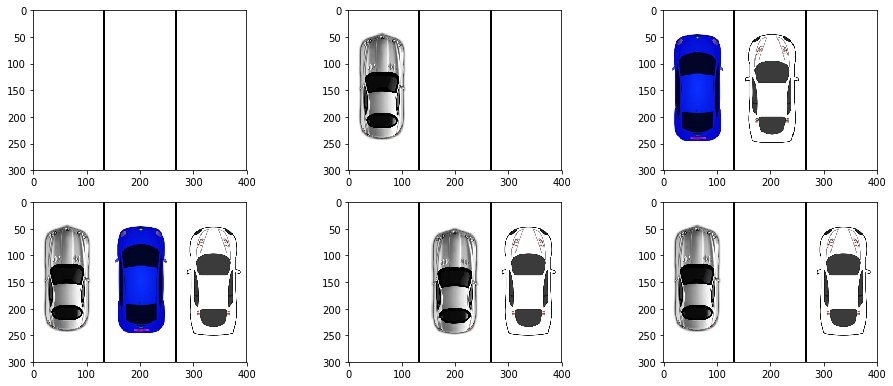

In [2]:
def abreImagem(i):
    i = cv2.imread(i)
    i = cv2.cvtColor(i, cv2.COLOR_BGR2RGB) # equivalente a img = imagem[:,:,::-1] # inverte de BGR para RGB
    i = i[::2,::2]
    return i
i0 = abreImagem('estaciona_vazio.jpg')
i1 = abreImagem('estaciona1.jpg')
i2 = abreImagem('estaciona2.jpg')
i3 = abreImagem('estaciona3.jpg')
i4 = abreImagem('estaciona4.jpg')
i5 = abreImagem('estaciona5.jpg')

plt.figure(figsize=(16, 10)) # LARGura e ALTura da imagem total em polegadas
plt.subplot2grid((3,3),(0,0)) #(linhas, colunas) do grid (l,c) do elemento
plt.imshow(i0, cmap='gray')
plt.subplot2grid((3,3),(0,1)) #(linhas, colunas) do grid (l,c) do elemento
plt.imshow(i1, cmap='gray')
plt.subplot2grid((3,3),(0,2)) #(linhas, colunas) do grid (l,c) do elemento
plt.imshow(i2, cmap='gray')
plt.subplot2grid((3,3),(1,0)) #(linhas, colunas) do grid (l,c) do elemento
plt.imshow(i3, cmap='gray')
plt.subplot2grid((3,3),(1,1)) #(linhas, colunas) do grid (l,c) do elemento
plt.imshow(i4, cmap='gray')
plt.subplot2grid((3,3),(1,2)) #(linhas, colunas) do grid (l,c) do elemento
plt.imshow(i5, cmap='gray')

## Função que subtrai uma imagem sobre a outra
Nesta função os valores dos pixels da imagem i2 serão subtraídos da imagem i1.
A subtração é importante para calcular corretamente a presença do veículo mesmo que o background seja diferente de branco.
Baseado na soma dos pixels da subtração é possível identifica se o veículo esta ou não na vaga de estacionamento.

In [3]:
def verificaVagas(iA, iB):
    iA = cv2.cvtColor(iA, cv2.COLOR_RGB2GRAY) # Converte para imagem em tons de cinza
    iB = cv2.cvtColor(iB, cv2.COLOR_RGB2GRAY) 
    result = iA - iB # realiza a subtração
    soma_pixels_das_colunas = [sum(x) for x in zip(*result)] # soma os valores dos pixels das colunas
    #print(soma_pixels_das_colunas)
    #As imagens possuem 400 pixels de largura portanto temos:
    # colunas analisadas para vaga1 vao da coluna 15 ate 118 e assim por diante
    soma_pixels_vaga1 = sum(1 for x in soma_pixels_das_colunas[15:118] if x>7000) # conta colunas com mais 7 mil de intensidade
    soma_pixels_vaga2 = sum(1 for x in soma_pixels_das_colunas[148:251] if x>7000) # conta colunas com mais 7 mil de intensidade
    soma_pixels_vaga3 = sum(1 for x in soma_pixels_das_colunas[281:384] if x>7000) # conta colunas com mais 7 mil de intensidade
    vaga1 = 'Ocupada' if soma_pixels_vaga1>30 else 'Livre'
    vaga2 = 'Ocupada' if soma_pixels_vaga2>30 else 'Livre'
    vaga3 = 'Ocupada' if soma_pixels_vaga3>30 else 'Livre'
    print('Situação das vagas no estacionamento')
    print('Vaga 1:', vaga1)
    print('Vaga 2:', vaga2)
    print('Vaga 3:', vaga3)

In [4]:
def subtrai(i1, i2):
    iA = cv2.cvtColor(i1, cv2.COLOR_RGB2GRAY) # Converte para imagem em tons de cinza
    iB = cv2.cvtColor(i2, cv2.COLOR_RGB2GRAY) 
    result = iA - iB # realiza a subtração
    soma_pixels_das_colunas = [sum(x) for x in zip(*result)] # soma os valores dos pixels das colunas
    
    #Abaixo temos o código da exibição com o matplotlib
    plt.figure(figsize=(16,4)) # LARGura e ALTura da imagem total em polegadas
    plt.subplot2grid((1,4),(0,0)) #(linhas, colunas) do grid (l,c) do elemento
    plt.title('Imagem 1')
    plt.imshow(iA, cmap='gray')
    plt.subplot2grid((1,4),(0,1)) #(linhas, colunas) do grid (l,c) do elemento
    plt.title('Imagem 2')
    plt.imshow(iB, cmap='gray')
    plt.subplot2grid((1,4),(0,2)) #(linhas, colunas) do grid (l,c) do elemento
    plt.title('Subtração')
    plt.imshow(result, cmap='gray')
    #Utilizando a função ravel() e plt.hist() para criar o histograma da imagem
    plt.subplot2grid((1,4),(0,3)) #(linhas, colunas) do grid (l,c) do elemento
    plt.title("Soma dos pixels nas colunas")
    plt.xlabel("")
    plt.ylabel("Intensidade")
    plt.plot(range(result.shape[1]), soma_pixels_das_colunas)
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.5)
    verificaVagas(i1,i2)
    plt.show()

## Resultados da subtração

Situação das vagas no estacionamento
Vaga 1: Livre
Vaga 2: Livre
Vaga 3: Livre


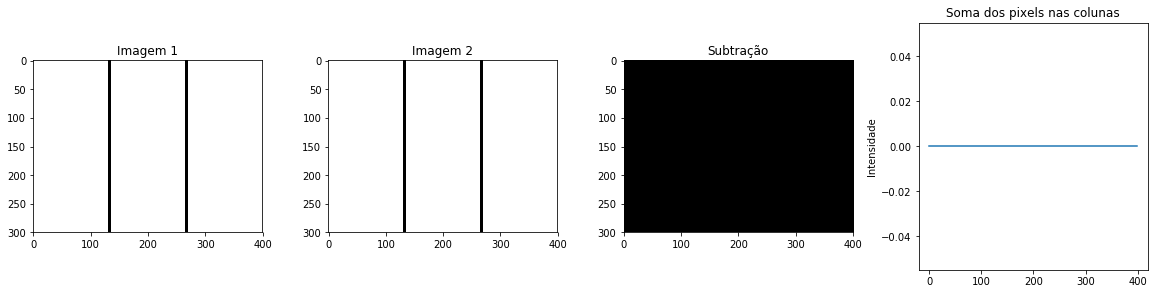

In [7]:
subtrai(i0,i0)

Situação das vagas no estacionamento
Vaga 1: Ocupada
Vaga 2: Livre
Vaga 3: Livre


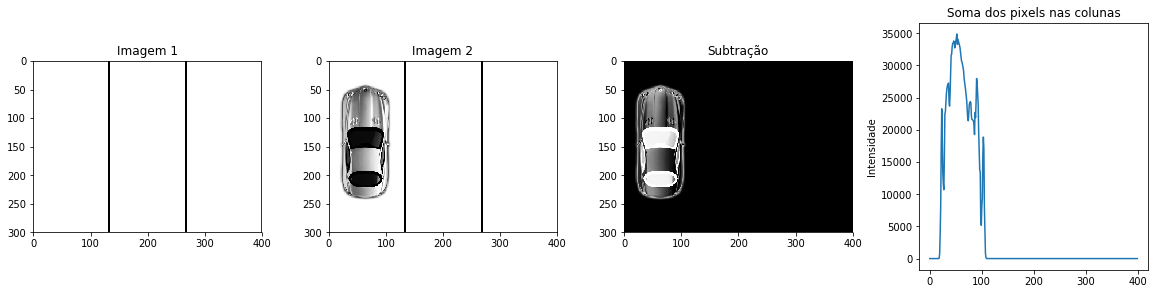

In [6]:
subtrai(i0,i1)

### Abaixo o segundo veículo é branco, portanto, veja como a soma intensidade dos pixels é menor.

Situação das vagas no estacionamento
Vaga 1: Ocupada
Vaga 2: Ocupada
Vaga 3: Livre


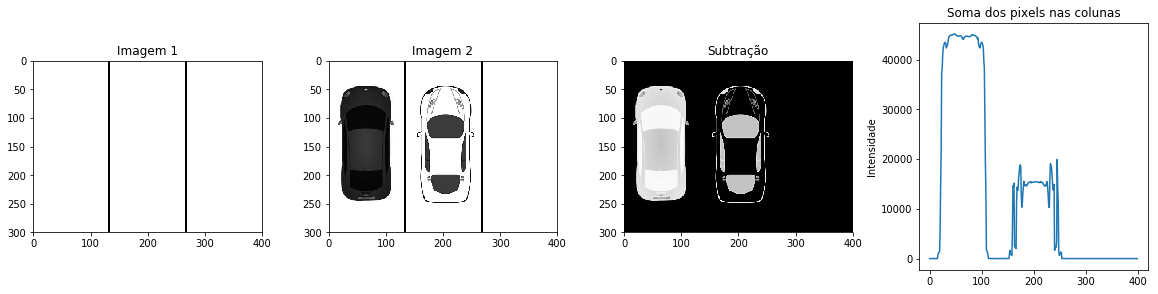

In [8]:
subtrai(i0,i2)

Situação das vagas no estacionamento
Vaga 1: Ocupada
Vaga 2: Ocupada
Vaga 3: Ocupada


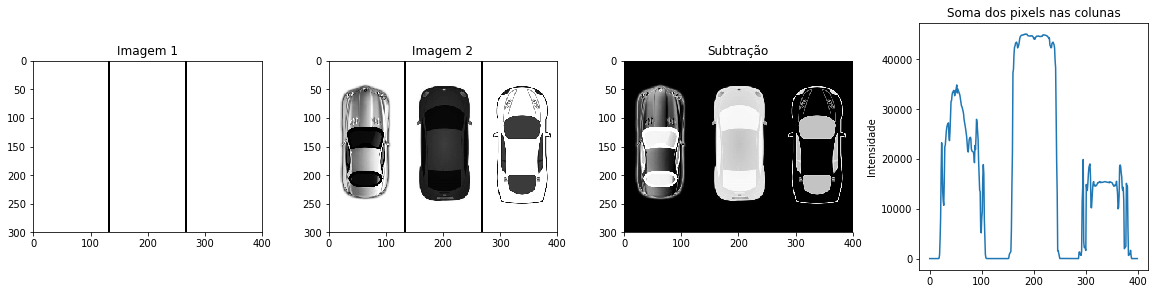

In [9]:
subtrai(i0,i3)

Situação das vagas no estacionamento
Vaga 1: Livre
Vaga 2: Ocupada
Vaga 3: Ocupada


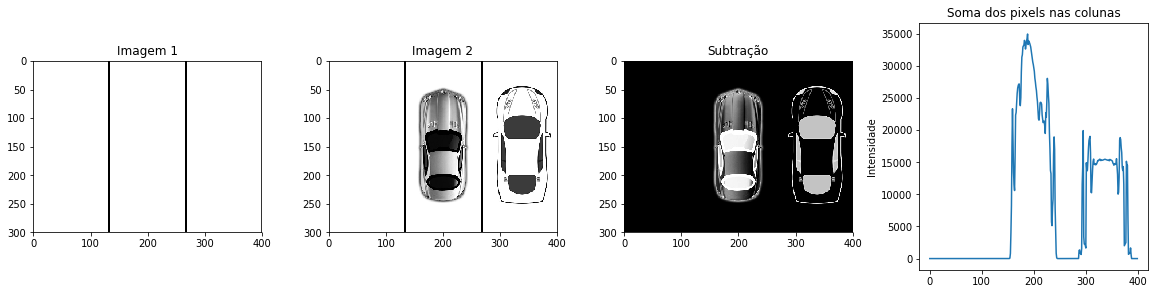

In [10]:
subtrai(i0,i4)

Situação das vagas no estacionamento
Vaga 1: Ocupada
Vaga 2: Livre
Vaga 3: Ocupada


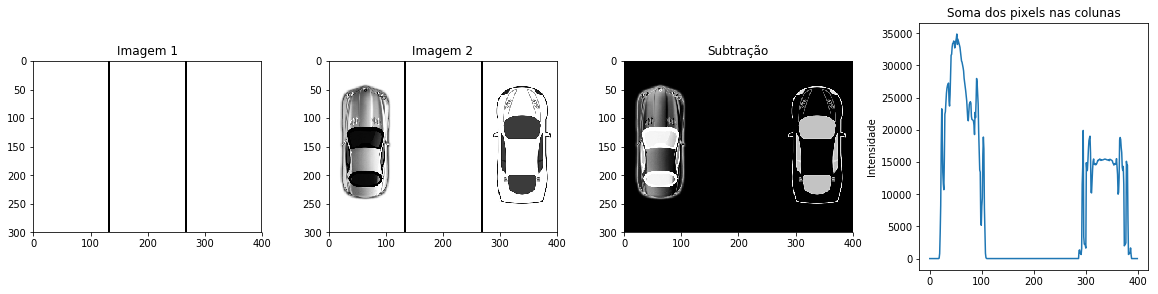

In [11]:
subtrai(i0,i5)